# Exploring the relationship between forest cover and CO2 emissions in South America.

## Data Description
### Data Source 
Environment Data collected from UNdata. Dataset contains CO2 Emissions, Land, Water, Threatened Species.
### Dataset Contents
**Carbon Dioxide Emissions:**

Columns: Country(Area), Year, Series, Value

**Land:**

Columns: Country(Area), Year, Series, Value

**Threatened Species:**

Columns: Country(Area), Year, Series, Value

**Water and Sanitation Services:**

Columns: Country(Area), Year, Series, Value

Obtained from: [Environment Dataset - UNdata](https://www.kaggle.com/datasets/vineethakkinapalli/united-nations-environment-data)



# Imparting Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('D:\Documentos\Github\Projects\Personal Projects\Exploring the Relationship Between Forest Cover and CO2 Emissions in South America\data\Carbon Dioxide Emission Estimates.csv')
dfl=pd.read_csv('D:\Documentos\Github\Projects\Personal Projects\Exploring the Relationship Between Forest Cover and CO2 Emissions in South America\data\Land.csv')


# Data Cleaning 

## Filtering Matching Years in both Datasets

I have two datasets—one containing information on emissions and the other on land use—spanning across the globe. However, I aim to narrow my focus specifically to South America. To achieve this, I need to utilize the data points that are common to both datasets, ensuring they share the same year and countries with available information in both sets.

In [12]:
# Extracting the years from the datasets
years_e = df['Year'].unique()
years_l = dfl['Year'].unique()

# Finding the years that are present in both datasets
coinciding_years = np.intersect1d(years_e, years_l)

# Filtering the datasets only with the years that are in both datasets
dfemi = df[(df['Year'].isin(coinciding_years))]
dfland = dfl[(dfl['Year'].isin(coinciding_years))]

# Renaming the columns
dfemi.columns = ['Country', 'Year', 'Type', 'Value']
dfland.columns = ['Country', 'Year', 'Type', 'Value']
dfemi['Year']=dfemi['Year'].astype(str)
dfland['Year']=dfland['Year'].astype(str)



C:\Users\mateo\AppData\Local\Temp\ipykernel_11808\844701771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfland['Year']=dfland['Year'].astype(str)


## Filtering South American Countries of the dataset


### Filtering Countries Present in Both Datasets

In order to use the data, is important to use the countrys that are in both datasets.

In [13]:

# Extracting the countries from the dataset
countries_l = dfland['Country'].unique()
countries_e = dfemi['Country'].unique()

# Due to the nature of the dataset and the country names, it is necessary (only for South America) to extract the first words of each country
countries_l = [(country.split(' ')[0]) for country in countries_l]
countries_e = [(country.split(' ')[0]) for country in countries_e]

# Writing a list with the countries of South America
south_american_countries = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela",
    "Trinidad"
]

# Finding the intersection of South American countries that are in both dataframes
coincident_countries = np.intersect1d(countries_e, countries_l)
coincident_south_american_countries = np.intersect1d(coincident_countries, south_american_countries)
coincident_south_american_countries



array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Paraguay', 'Peru', 'Suriname', 'Trinidad', 'Uruguay', 'Venezuela'],
      dtype='<U13')

## Filtering the coincident south american countries in the land dataframe

In [14]:
dfland = dfland.copy() 
 # This is done to explicitly work on a copy of the data and not a view of the original dataframe
# Add another column with the first words of each country
dfland['Country_processed'] = dfland['Country'].apply(lambda x: x.split()[0])#lambda x is equivalent to: [country.split()[0] for country in countries]
df_countries_years = dfland[dfland['Country_processed'].isin(coincident_south_american_countries)]
# If I want to convert everything to lowercase, I use .str.lower.
df_countries_years = df_countries_years.drop(columns=['Country_processed'])
print(df_countries_years['Country'].unique())

['Argentina' 'Bolivia (Plurin. State of)' 'Brazil' 'Chile' 'Colombia'
 'Ecuador' 'Paraguay' 'Peru' 'Suriname' 'Trinidad and Tobago' 'Uruguay'
 'Venezuela (Boliv. Rep. of)']


## Filtering the coincident south american countries in the emissions dataframe

In [15]:
dfemi = dfemi.copy()
dfemi['Country_processed'] = dfemi['Country'].apply(lambda x: x.split()[0])
df_countries_years_e = dfemi[dfemi['Country_processed'].isin(coincident_south_american_countries)]
df_countries_years_e = df_countries_years_e.drop(columns=['Country_processed'])
df_countries_years['Year']=df_countries_years['Year'].astype(str)
df_countries_years_e['Country'].unique()

array(['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela (Boliv. Rep. of)'],
      dtype=object)

## Splitting Dataframes by Data Type

The database structure comprises two columns containing all the information. To effectively utilize this data for visualization in Power BI, I need to split the dataframes by datatype. This separation will facilitate the creation of distinct sheets in Excel or tables in SQL, streamlining the process of data visualization in Power BI.

In [16]:
# Divide dataframes by type
# Emissions
percapitae = df_countries_years_e[df_countries_years_e['Type'] == 'Emissions per capita (metric tons of carbon dioxide)']
emissions = df_countries_years_e[df_countries_years_e['Type'] == 'Emissions (thousand metric tons of carbon dioxide)']
# Land
landarea = df_countries_years[df_countries_years['Type'] == 'Land area (thousand hectares)']
crops = df_countries_years[df_countries_years['Type'] == 'Permanent crops (thousand hectares)']
forest_cover = df_countries_years[df_countries_years['Type'] == 'Forest cover (thousand hectares)']
arable_land = df_countries_years[df_countries_years['Type'] == 'Arable land (thousand hectares)']


## Writing Data to Excel Sheets

In [17]:
Years = pd.DataFrame(df_countries_years['Year'].unique())
Years.columns = ['Year']
Countries = pd.DataFrame(df_countries_years['Country'].unique())
Countries.columns = ['Country']

with pd.ExcelWriter('Dataclean.xlsx') as writer:
    percapitae.to_excel(writer, sheet_name='Emissions per capita', index=False)
    emissions.to_excel(writer, sheet_name='Emissions', index=False)
    landarea.to_excel(writer, sheet_name='Land area', index=False)
    crops.to_excel(writer, sheet_name='Permanent crops', index=False)
    forest_cover.to_excel(writer, sheet_name='Forest cover', index=False)
    arable_land.to_excel(writer, sheet_name='Arable land', index=False)
    Years.to_excel(writer, sheet_name='Years', index=False)
    Countries.to_excel(writer, sheet_name='Countries', index=False)


## Writing Data to SQL Database

In [18]:
import sqlite3
import pandas as pd

# Database Connection(This connection allow me to interact with the database)

conn = sqlite3.connect('dataclean.db')

# Function to write DataFrame to SQL table
def write_dataframe_to_sql(dataframe, table_name, connection):
    dataframe.to_sql(table_name, connection, if_exists='replace', index=False)

# Write each DataFrame to a SQL table
write_dataframe_to_sql(percapitae, 'Emissions per capita', conn)
write_dataframe_to_sql(emissions, 'Emissions', conn)
write_dataframe_to_sql(landarea, 'Land area', conn)
write_dataframe_to_sql(crops, 'Permanent crops', conn)
write_dataframe_to_sql(forest_cover, 'Forest cover', conn)
write_dataframe_to_sql(arable_land, 'Arable land', conn)
write_dataframe_to_sql(Years, 'Years', conn)
write_dataframe_to_sql(Countries, 'Countries', conn)

# Commit the changes and close the connection
conn.commit()
conn.close()


# Data Anlysis and Visualization

 I want to create an initial visualization using Seaborn 

### Emissions per capita

C:\Users\mateo\AppData\Local\Temp\ipykernel_11808\1857634292.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=percapita,order=None)


Text(0, 0.5, 'Metric tons of CO2 per capita')

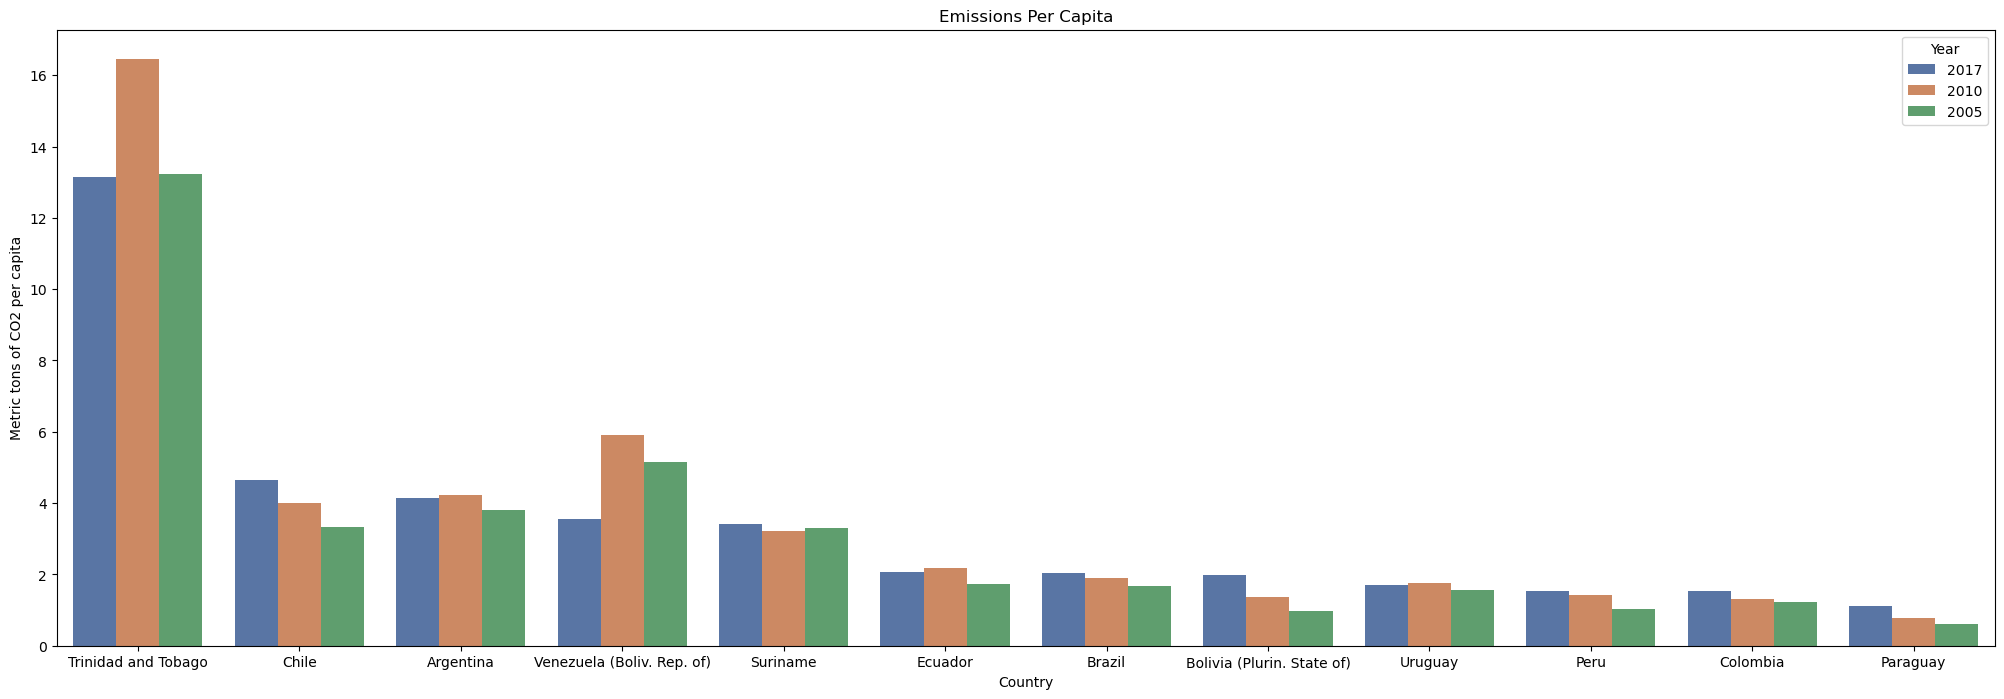

In [19]:
plt.figure(figsize=(25, 8))
percapita=percapitae.sort_values(by=['Year','Value'],ascending=False)
sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=percapita,order=None)
plt.title("Emissions Per Capita")
plt.xlabel("Country")
plt.ylabel("Metric tons of CO2 per capita")

#datasorted1.head(12)

#### Analysis:

There are several intriguing insights to explore in this visualization. Firstly, the inclusion of Trinidad and Tobago begs the question: why? One plausible explanation could be their relatively small population size(1.531 Millions in 2022), which tends to inflate emissions per capita figures. Similarly, Venezuela stands out as the sole country showing a significant reduction in per capita emissions, likely due to a corresponding decline in population size.





### Emissions and land area

C:\Users\mateo\AppData\Local\Temp\ipykernel_11808\3885136749.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=emissions1,order=None)
C:\Users\mateo\AppData\Local\Temp\ipykernel_11808\3885136749.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x='Country',y='Value', ci=None,palette="dark", data=landarea,order=None)


Text(0, 0.5, 'Land Area')

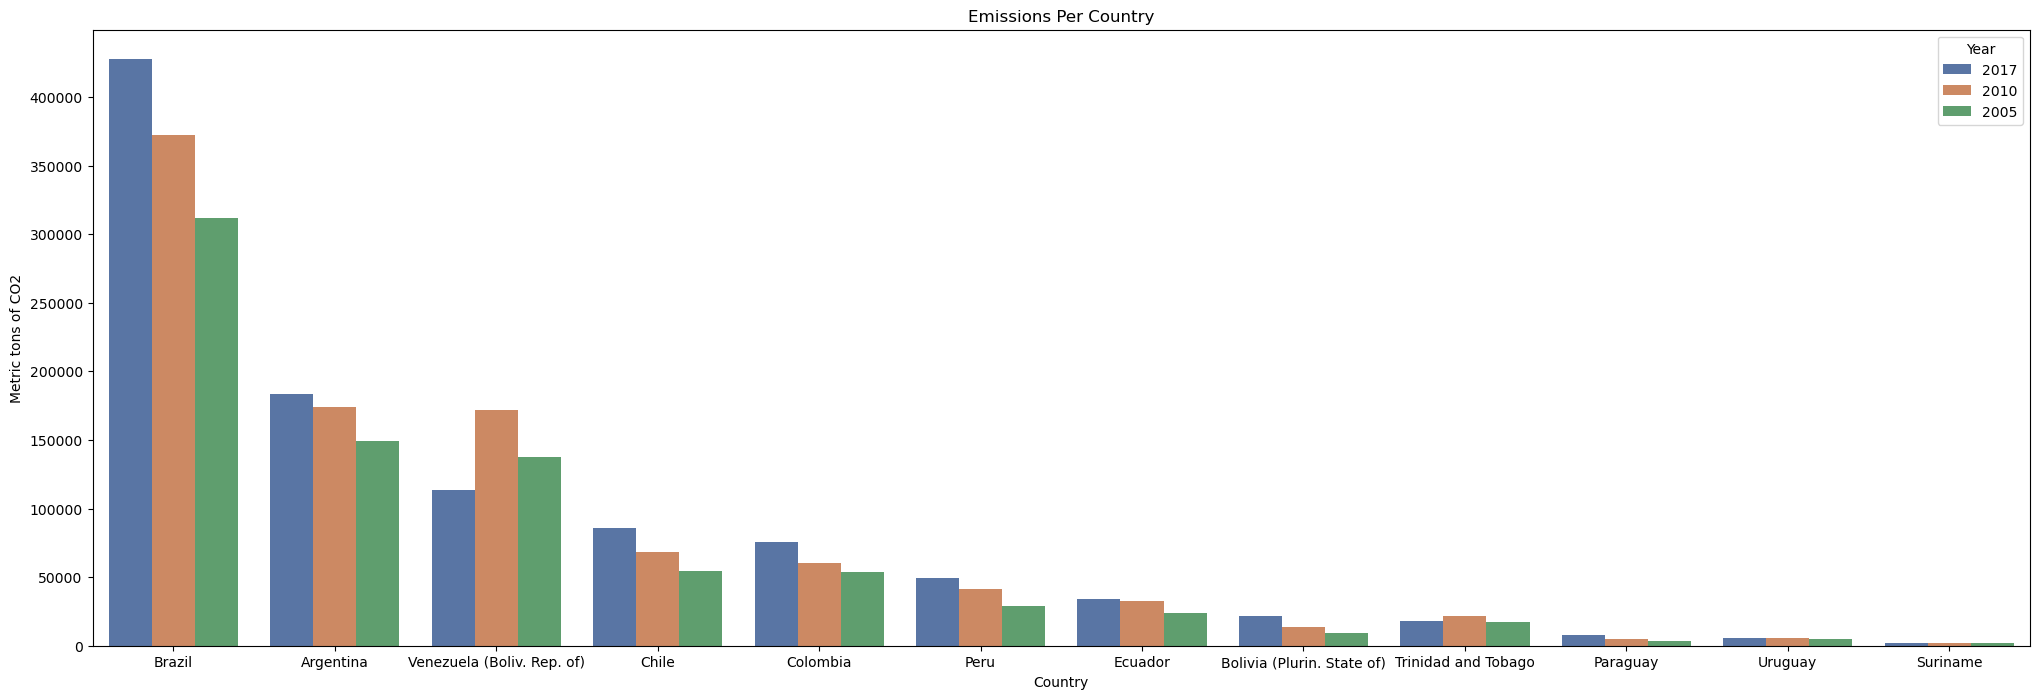

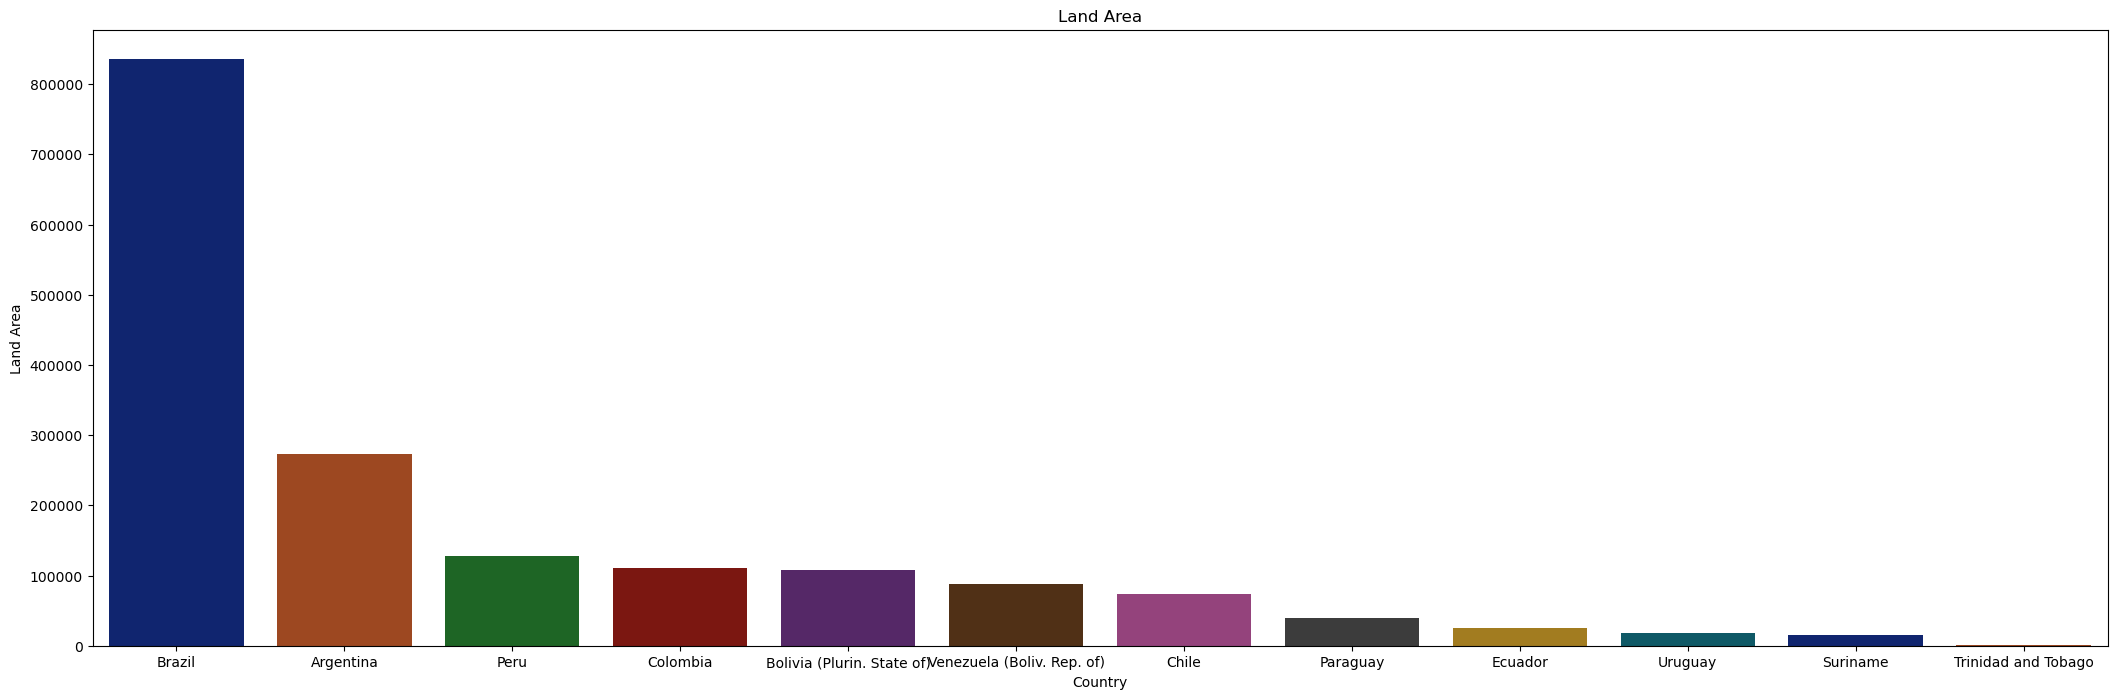

In [20]:
plt.figure(figsize=(25, 8))
emissions1=emissions.sort_values(by=['Year','Value'],ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=emissions1,order=None)
plt.title("Emissions Per Country")
plt.xlabel("Country")
plt.ylabel("Metric tons of CO2")
plt.figure(figsize=(26, 8))
landarea=landarea.sort_values(by=['Value'],ascending=False)
g=sns.barplot(x='Country',y='Value', ci=None,palette="dark", data=landarea,order=None)
plt.title("Land Area")
plt.xlabel("Country")
plt.ylabel("Land Area")


#### Analysis
Upon reviewing the last two images, it becomes apparent that Brazil's considerable emissions can be attributed to its vast size and population. Similarly, Venezuela stands out once more as the sole country exhibiting a reduction in emissions. This decline may likely be linked to the ongoing crisis within the country. Further exploration into the socioeconomic and environmental factors driving these trends could provide valuable insights.

#### I also conducted a comparison of the evolution of emissions, emissions per capita, arable land, and forest cover

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

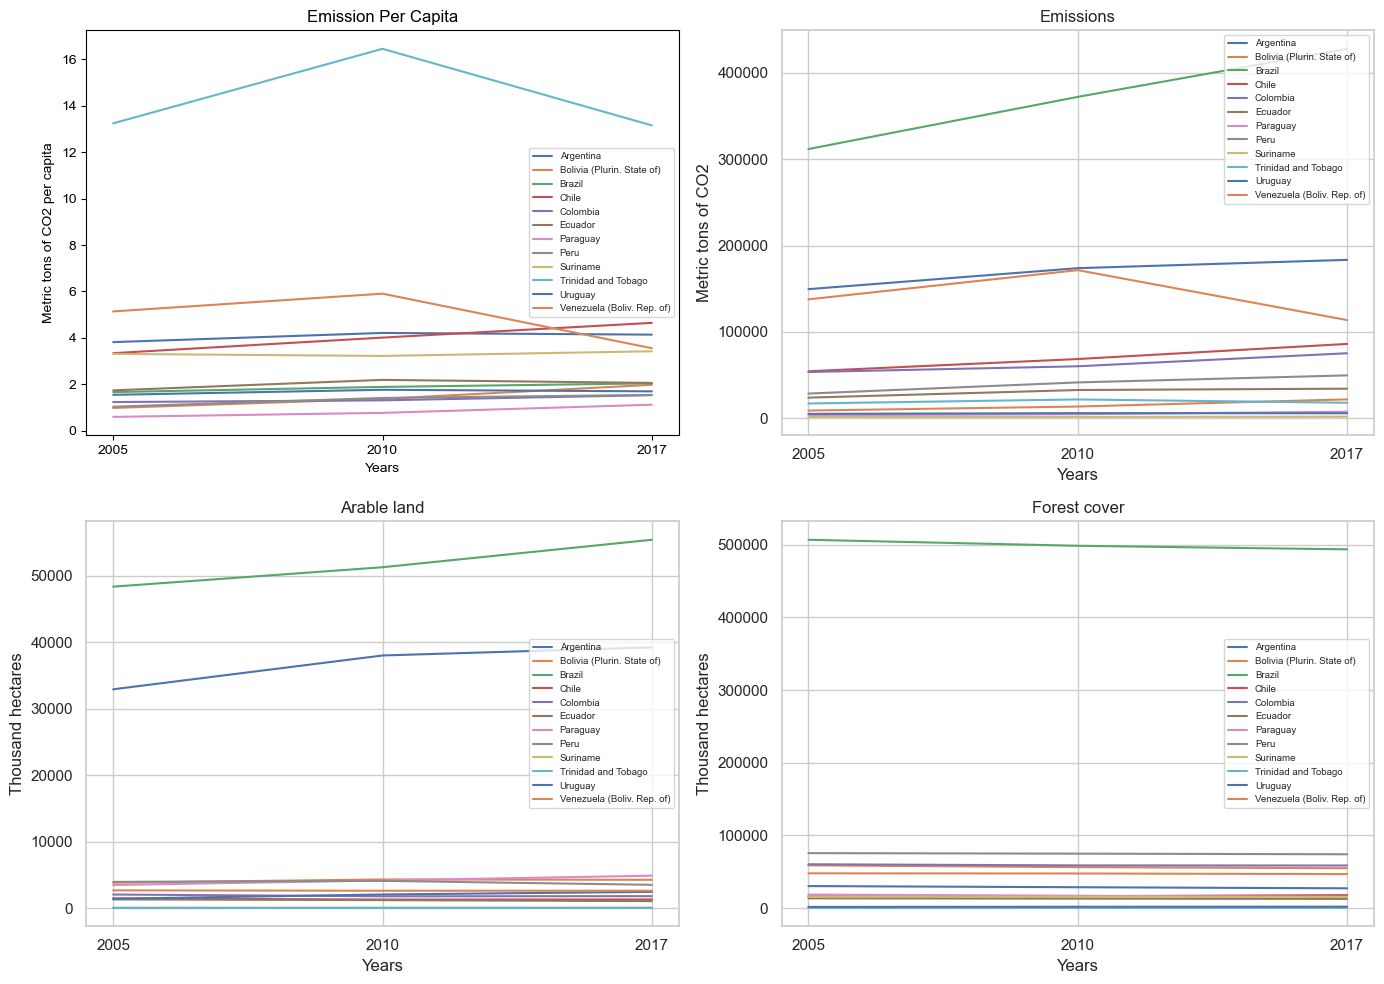

In [21]:

#Emissions per capita
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=percapitae)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2 per capita")
gea.set_title("Emission Per Capita")
plt.legend(fontsize='xx-small',loc='best')#opciones: x-small,small,medium,large,x-large,etc. loc: upper right,lower left, center, etc.
#Emissions
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2,2)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=emissions)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2")
gea.set_title("Emissions")
plt.legend(fontsize='xx-small',loc='best')
#Arable land
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=arable_land)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Arable land")
plt.legend(fontsize='xx-small',loc='best')
#Forest cover
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 4)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=forest_cover)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Forest cover")
plt.legend(fontsize='xx-small',loc='best')

plt.tight_layout()
plt.show()

#### Due to the complexity of comparing these four variables visually, I developed a Power BI dashboard to facilitate this process.

# POWERBI DASHBOARD

#### Utilizing either the SQL database or Excel sheets, I input the data into Power BI and create a dashboard that encompasses specific views of each variable (Emissions per capita, emissions, arable land, and forest cover) as well as the relationships between them.


In [22]:
from IPython.display import HTML

# Código HTML del Dashboard de Power BI
html_code_powerbi_dashboard = """
<iframe title="Landandemissionsdashboard" width="1500" height="1000" src="https://app.powerbi.com/view?r=eyJrIjoiODc2ODkzNzgtMzdiYS00Y2ZjLTk4ZmQtZWQ4ZWFjMTIyNDY5IiwidCI6IjUwNjQwNTg0LTJhNDAtNDIxNi1hODRiLTliM2VlMGYzZjZjZiIsImMiOjR9" frameborder="0" allowFullScreen="true"></iframe>
"""

# Mostrar el Dashboard dentro del notebook
display(HTML(html_code_powerbi_dashboard))

# Conclusions


In the vast majority of countries, except for Chile, Uruguay, and Venezuela, there is a clear trend of decreasing forest coverage, coupled with an increase in emissions over the years. This correlation suggests that as forest coverage declines, carbon dioxide emissions rise. Similarly, this trend is also observed between forest coverage and cultivable land. However, in certain countries, this relationship does not hold, indicating that this link may not always be valid.

To further explore these conclusions, a more in-depth analysis of the underlying factors influencing these trends is necessary. For instance, examining environmental conservation policies, shifts in industrial or agricultural activities, and specific socioeconomic factors in each country could provide a more comprehensive understanding of these dynamics. This approach could shed light on why Venezuela shows a decrease in both emissions and forest cover, or why Chile and Uruguay exhibit an increase in forest cover alongside emissions. Moreover, delving into regional or local data could unveil more nuanced patterns and trends that may have been overlooked in this national-level analysis.
